In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df = pd.read_csv('SupermarketSales.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df["Order Date"] = pd.DatetimeIndex(df["Order Date"])
df["Ship Date"] = pd.DatetimeIndex(df["Ship Date"])

C:\Users\Abhishek Garg\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '15-04-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\Abhishek Garg\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '22-11-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\Abhishek Garg\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13-05-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\Abhishek Garg\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '27-08-2015' in DD/MM/YYYY format. Provide format or specify infer_date

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,Row ID,int64,9800,0
1,Order ID,object,4922,0
2,Order Date,datetime64[ns],1230,0
3,Ship Date,datetime64[ns],1326,0
4,Ship Mode,object,4,0
5,Customer ID,object,793,0
6,Customer Name,object,793,0
7,Segment,object,3,0
8,Country,object,1,0
9,City,object,529,0


In [8]:
df[df["Postal Code"].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,2018-05-12,2018-10-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,2016-07-11,2016-09-11,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,2017-06-04,2017-10-04,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [9]:
df["Postal Code"]=df["Postal Code"].fillna(5401.0)

In [11]:
df['Year'] = pd.DatetimeIndex(df['Order Date']).year
df['Month'] = pd.DatetimeIndex(df['Order Date']).month
df['Day'] = pd.DatetimeIndex(df['Order Date']).day

In [12]:
df['Day of Week'] = df['Order Date'].dt.strftime('%A')

In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,Day,Day of Week
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8,11,Friday
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8,11,Friday
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12,6,Wednesday
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11,10,Thursday
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11,10,Thursday


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9800.0,55217.343265,32066.750532,1040.000,23223.000,57551.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48
Year,9800.0,2016.724184,1.123984,2015.000,2016.000,2017.00,2018.000,2018.00
Month,9800.0,7.186122,3.424108,1.000,4.000,8.00,10.000,12.00
Day,9800.0,16.119184,8.073122,1.000,10.000,16.00,23.000,31.00


array([[<AxesSubplot:title={'center':'Order Date'}>,
        <AxesSubplot:title={'center':'Ship Date'}>],
       [<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>]], dtype=object)

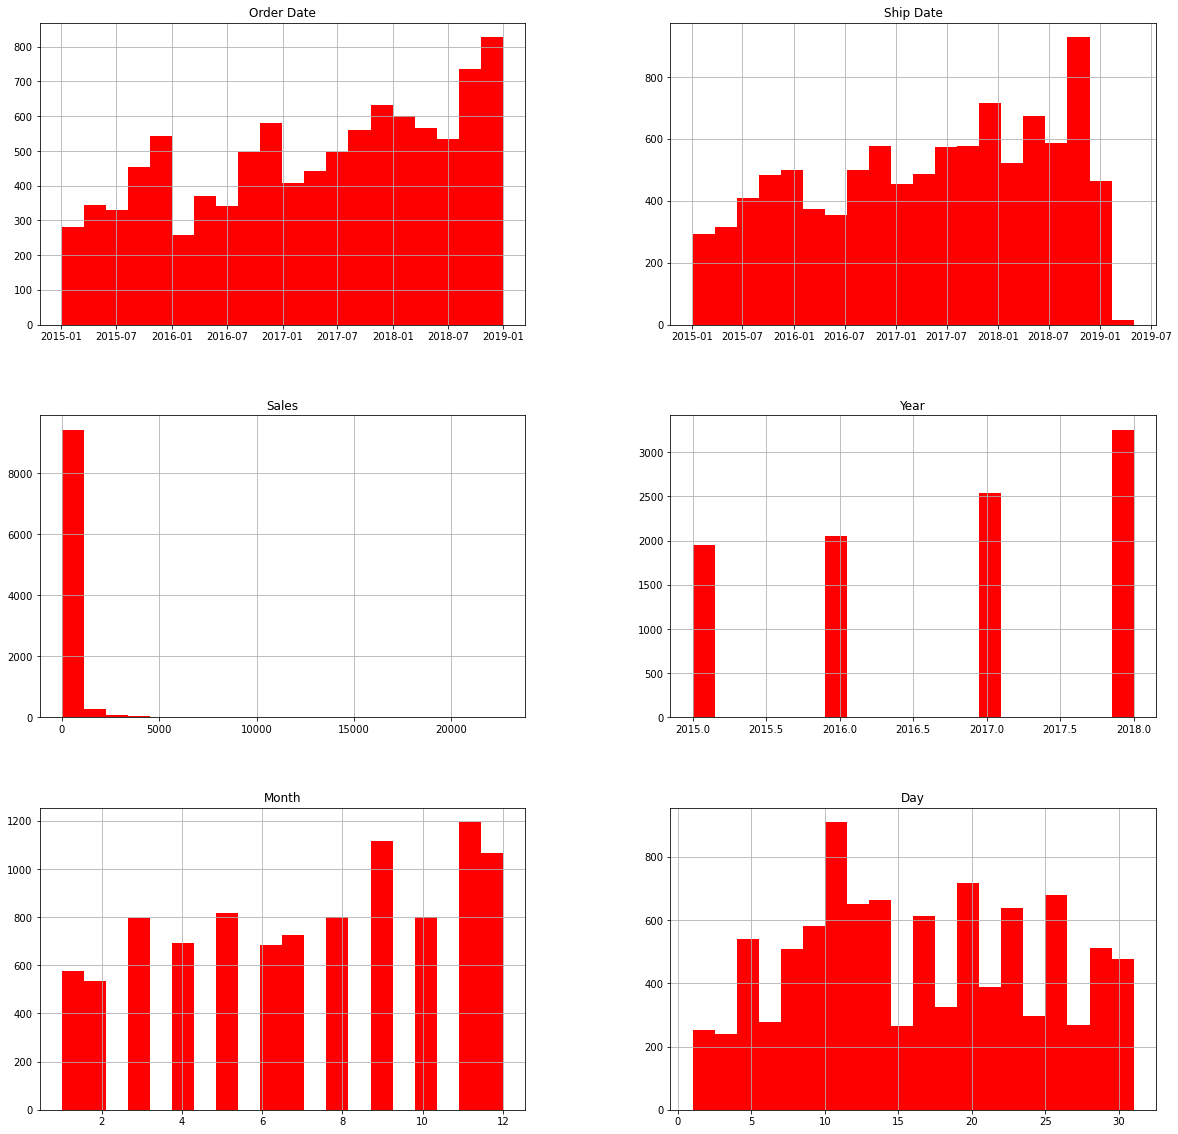

In [15]:
df[['Order Date' , 'Ship Date' , 'Sales' , 'Year', 'Month', 'Day']].hist(bins=20 ,figsize = (20,20), color = 'r')

In [16]:
best_customer = df.pivot_table(values = "Sales" , index = "Customer Name" , aggfunc = "sum")
best_customer = best_customer.sort_values(by=['Sales'], ascending=False).head(20)
best_customer.reset_index(inplace=True) # we will have to reset the index to add the customer name into dataframe 
best_customer['Sales']=best_customer['Sales'].round(2)
best_customer

,Customer Name,Sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57
5,Ken Lonsdale,14175.23
6,Sanjit Chand,14142.33
7,Hunter Lopez,12873.30
8,Sanjit Engle,12209.44
9,Christopher Conant,12129.07


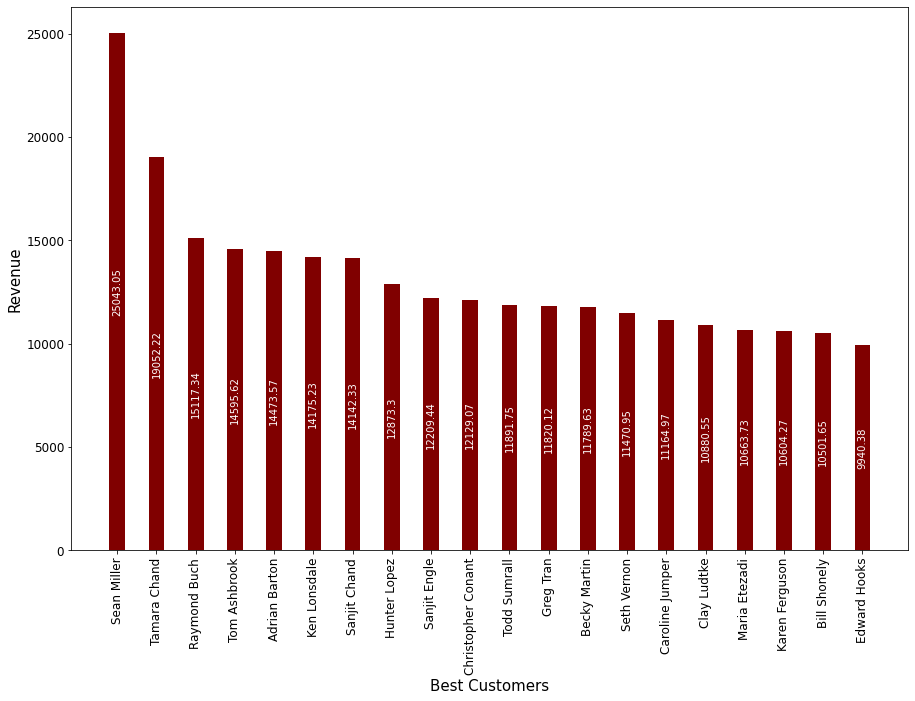

In [17]:
fig = plt.figure(figsize = (15, 10))
 

plt.bar(best_customer['Customer Name'],best_customer['Sales'] , color ='maroon',
        width = 0.4)
 
plt.xlabel("Best Customers",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

for i , v in enumerate(best_customer['Sales']):
    plt.text(i, v/2 , str(v) , ha='center' , va='center' , rotation=90 , color='white')
plt.show()

In [18]:
best_cities = df.pivot_table(values = "Sales" , index = "City" , aggfunc = "sum")
best_cities = best_cities.sort_values(by=['Sales'], ascending=False).head(20)
best_cities.reset_index(inplace=True)
best_cities['Sales']=best_cities['Sales'].round(2)
best_cities

,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


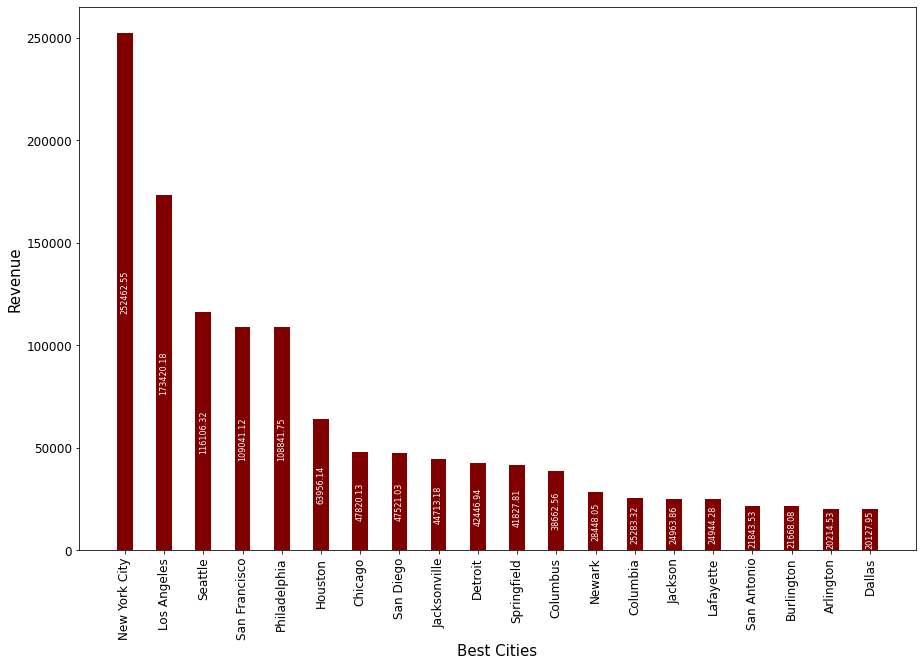

In [21]:
fig = plt.figure(figsize = (15, 10))
 
    
plt.bar(best_cities['City'],best_cities['Sales'] , color ='maroon',
        width = 0.4)
 
plt.xlabel("Best Cities",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

for i , v in enumerate(best_cities['Sales']):
    plt.text(i, v/2 , str(v) , ha='center' , va='center' , rotation=90 , color='white' , fontsize=8)
plt.show()

In [22]:
best_dayofweek = df.pivot_table(values = "Sales" , index = "Day of Week" , aggfunc = "sum")
best_dayofweek = best_dayofweek.sort_values(by=['Sales'], ascending=False).head(20)
best_dayofweek.reset_index(inplace=True) 
best_dayofweek['Sales']=best_dayofweek['Sales'].round(2)
best_dayofweek

,Day of Week,Sales
0,Saturday,394511.12
1,Tuesday,369922.11
2,Monday,355652.72
3,Wednesday,332748.51
4,Sunday,322770.80
5,Friday,257430.36
6,Thursday,228501.16


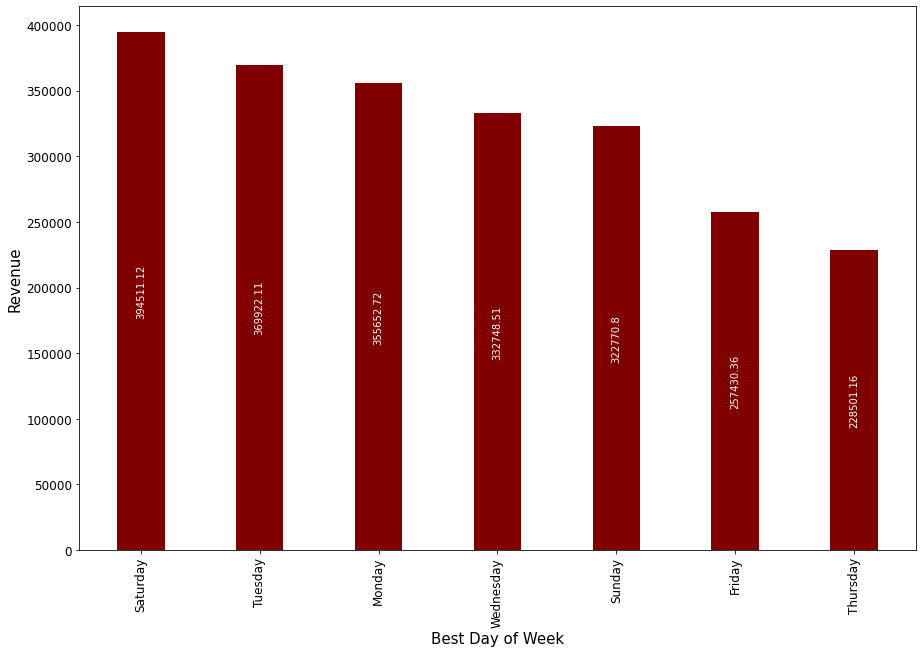

In [23]:
fig = plt.figure(figsize = (15, 10))
 

plt.bar(best_dayofweek['Day of Week'],best_dayofweek['Sales'] , color ='maroon',
        width = 0.4)
 
plt.xlabel("Best Day of Week",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

for i , v in enumerate(best_dayofweek['Sales']):
    plt.text(i, v/2 , str(v) , ha='center' , va='center' , rotation=90 , color='white')
plt.show()

In [24]:
best_category = df.pivot_table(values = "Sales" , index = "Category" , aggfunc = "sum")
best_category = best_category.sort_values(by=['Sales'], ascending=False).head()
best_category.reset_index(inplace=True)
best_category['Sales']=best_category['Sales'].round(2)
best_category

,Category,Sales
0,Technology,827455.87
1,Furniture,728658.58
2,Office Supplies,705422.33


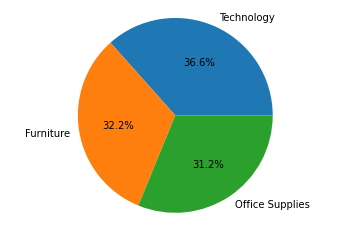

In [25]:
plt.pie(best_category['Sales'] , labels=best_category['Category'] , autopct='%1.1f%%')
plt.axis('equal')
plt.show()

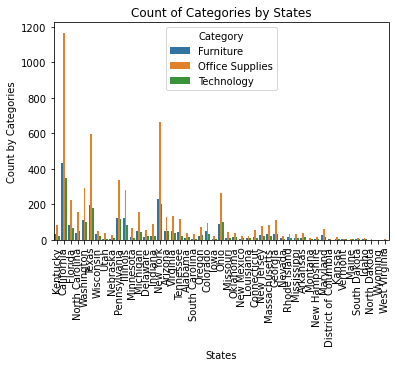

In [26]:
sns.countplot(data=df,x="State",hue='Category')
plt.title("Count of Categories by States")
plt.xlabel("States")
plt.ylabel("Count by Categories")
plt.xticks(rotation=90)
plt.show()

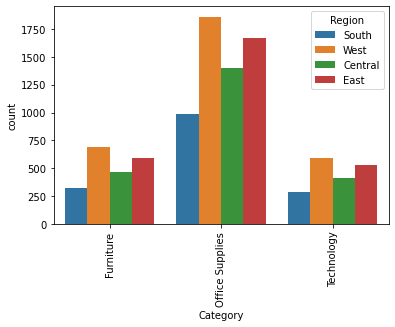

In [27]:
sns.countplot(data=df,x="Category",hue='Region')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Number of Customers Per Year')

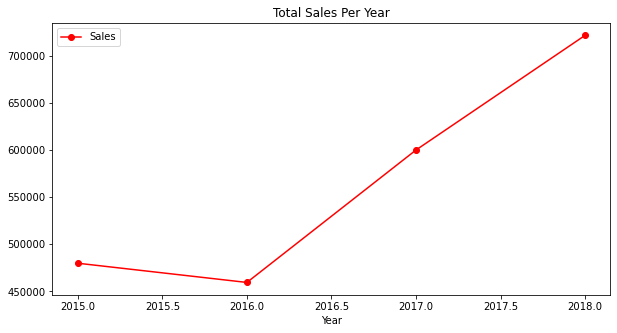

<Figure size 432x288 with 0 Axes>

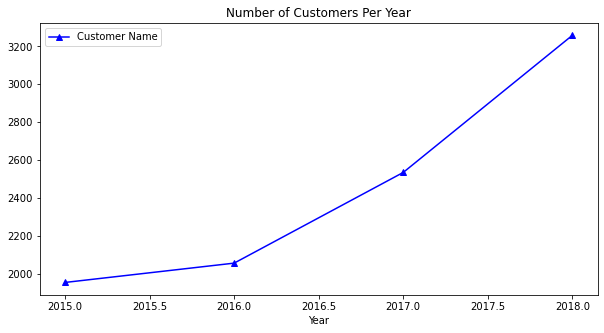

In [28]:
axis = df.groupby('Year')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Total Sales Per Year')

plt.figure()
axis = df.groupby('Year')[['Customer Name']].count().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Number of Customers Per Year')

Text(0.5, 1.0, 'Number of Customers Per Month')

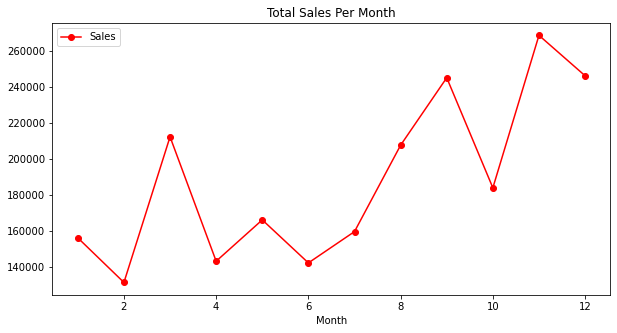

<Figure size 432x288 with 0 Axes>

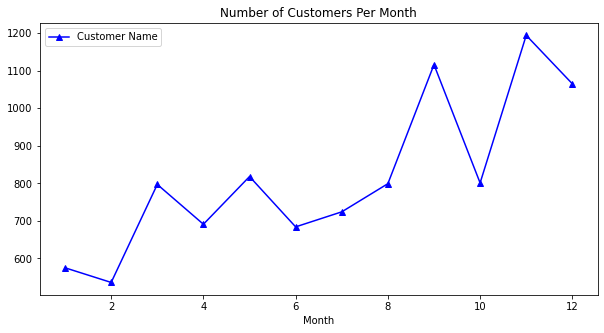

In [29]:
axis = df.groupby('Month')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Total Sales Per Month')

plt.figure()
axis = df.groupby('Month')[['Customer Name']].count().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Number of Customers Per Month')

Text(0.5, 1.0, 'Number of Customers Per Day')

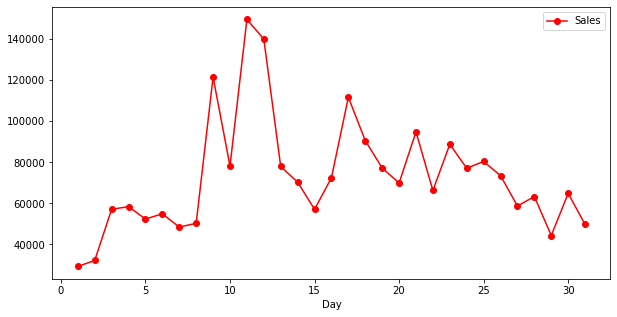

<Figure size 432x288 with 0 Axes>

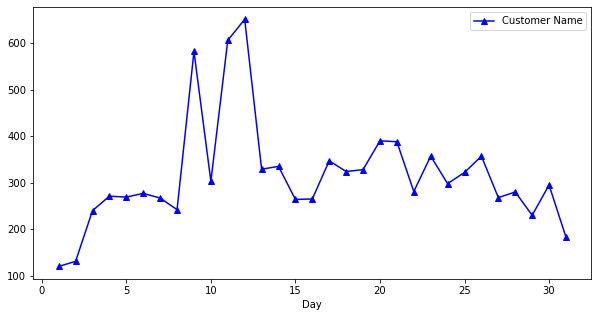

In [30]:
ax = df.groupby('Day')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Total Sales Per Day')

plt.figure()
ax = df.groupby('Day')[['Customer Name']].count().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Number of Customers Per Day')

<AxesSubplot:xlabel='Order Date'>

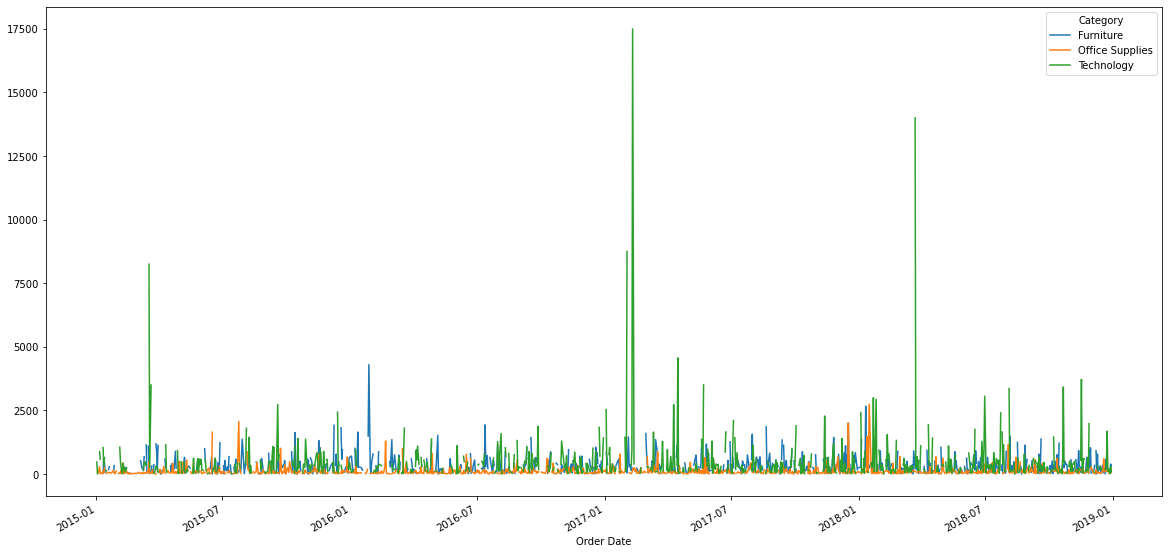

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
df.groupby(['Order Date','Category']).mean()['Sales'].unstack().plot(ax=ax)

In [69]:
!pip install prophet
from prophet import Prophet

In [71]:
Prophet()

In [75]:
df = df.rename(columns={'Order Date':'ds', 'Sales':'y'})


In [76]:
df

,Row ID,Order ID,ds,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,y,Year,Month,Day,Day of Week
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8,11,Friday
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8,11,Friday
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12,6,Wednesday
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11,10,Thursday
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11,10,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017,5,21,Sunday
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016,12,1,Thursday
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016,12,1,Thursday
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016,12,1,Thursday


In [77]:
m = Prophet()
m.fit(df)

18:07:50 - cmdstanpy - INFO - Chain [1] start processing
18:07:54 - cmdstanpy - INFO - Chain [1] done processing


In [78]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [79]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,218.670738,-520.719239,1162.093610,218.670738,218.670738,37.501840,37.501840,37.501840,0.528903,0.528903,0.528903,36.972937,36.972937,36.972937,0.0,0.0,0.0,256.172577
1,2015-01-03,218.808692,-592.550540,1074.010401,218.808692,218.808692,53.912339,53.912339,53.912339,17.958336,17.958336,17.958336,35.954003,35.954003,35.954003,0.0,0.0,0.0,272.721030
2,2015-01-04,218.946645,-573.371729,1040.436431,218.946645,218.946645,8.103444,8.103444,8.103444,-26.490785,-26.490785,-26.490785,34.594229,34.594229,34.594229,0.0,0.0,0.0,227.050090
3,2015-01-06,219.222552,-564.800726,1015.552986,219.222552,219.222552,12.287938,12.287938,12.287938,-18.869866,-18.869866,-18.869866,31.157804,31.157804,31.157804,0.0,0.0,0.0,231.510490
4,2015-01-07,219.360506,-468.367180,1101.039386,219.360506,219.360506,42.892827,42.892827,42.892827,13.636789,13.636789,13.636789,29.256039,29.256039,29.256039,0.0,0.0,0.0,262.253333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,2019-12-26,216.212501,-621.354380,1036.599020,197.843629,234.904577,49.343796,49.343796,49.343796,18.751211,18.751211,18.751211,30.592585,30.592585,30.592585,0.0,0.0,0.0,265.556297
1591,2019-12-27,216.198514,-552.108967,1001.128164,197.763580,234.999467,33.491883,33.491883,33.491883,0.528903,0.528903,0.528903,32.962980,32.962980,32.962980,0.0,0.0,0.0,249.690397
1592,2019-12-28,216.184527,-483.128967,1096.040599,197.683531,235.094357,52.846168,52.846168,52.846168,17.958336,17.958336,17.958336,34.887833,34.887833,34.887833,0.0,0.0,0.0,269.030695
1593,2019-12-29,216.170540,-576.458756,988.697737,197.603481,235.132793,9.841876,9.841876,9.841876,-26.490785,-26.490785,-26.490785,36.332661,36.332661,36.332661,0.0,0.0,0.0,226.012416


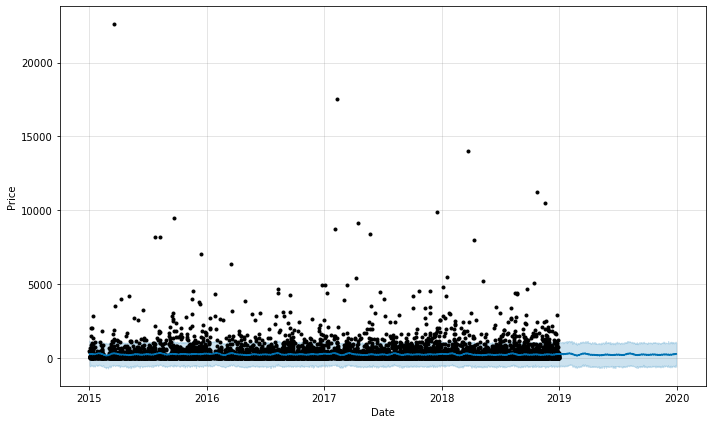

In [80]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

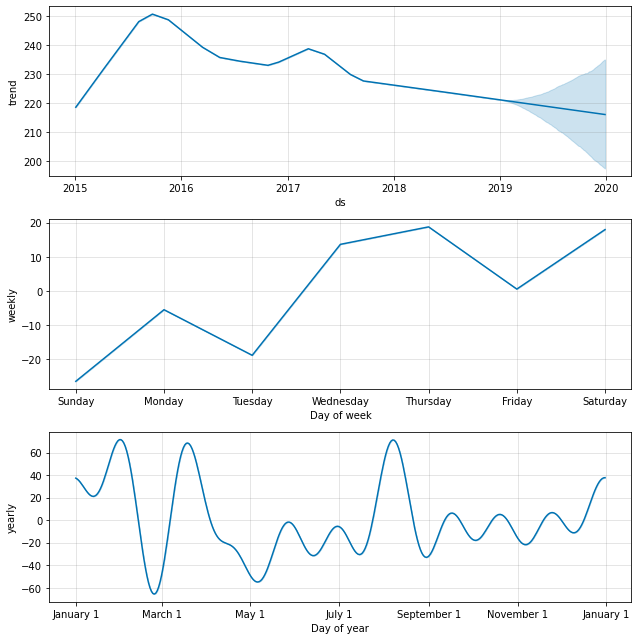

In [81]:
figure3 = m.plot_components(forecast)